In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv('marketing_campaign.csv', sep=';')

In [22]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [26]:
print("Eksik Veri Sayıları:\n")
print(df.isnull().sum())

Eksik Veri Sayıları:

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [30]:
df['Age'] = 2024 - df['Year_Birth']

In [32]:
df.dropna(subset=['Income'], inplace=True)

In [34]:
df = df[df['Year_Birth'] > 1900]

In [36]:
df = df[df['Income'] < 200000]

In [40]:
df['Marital_Status'] = df['Marital_Status'].replace(['Alone', 'Absurd', 'YOLO'], 'Single')

In [42]:
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

In [44]:
df['Total_Spent'] = df[spending_cols].sum(axis=1)

In [46]:
print(df[['Year_Birth', 'Age', 'Total_Spent']].head())

   Year_Birth  Age  Total_Spent
0        1957   67         1617
1        1954   70           27
2        1965   59          776
3        1984   40           53
4        1981   43          422


In [48]:
df['Age'].mean()

55.08634719710669

In [50]:
df['Total_Spent'].mean()

607.2680831826401

In [52]:
df.shape

(2212, 31)

In [54]:
# 1. Toplam Alışveriş Sayısını Hesaplama (Web + Katalog + Mağaza)
df['Total_Purchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

In [58]:
# 2. Kanal Bazlı Dağılımı Hesaplama (Yüzde Olarak)
total_purchases_sum = df['Total_Purchases'].sum()

web_percent = (df['NumWebPurchases'].sum() / total_purchases_sum) * 100
store_percent = (df['NumStorePurchases'].sum() / total_purchases_sum) * 100
catalog_percent = (df['NumCatalogPurchases'].sum() / total_purchases_sum) * 100

In [60]:
# 3. Genel Kampanya Başarı (Dönüşüm) Oranı
# Response sütunu 1 (evet) ve 0 (hayır) olduğu için ortalaması bize oranı verir
conversion_rate = df['Response'].mean() * 100

In [62]:
print(f"Toplam Alışveriş İçindeki Paylar:")
print(f"- Web Alışverişleri: %{web_percent:.2f}")
print(f"- Mağaza Alışverişleri: %{store_percent:.2f}")
print(f"- Katalog Alışverişleri: %{catalog_percent:.2f}")
print(f"\nSon Kampanya Dönüşüm Oranı: %{conversion_rate:.2f}")

Toplam Alışveriş İçindeki Paylar:
- Web Alışverişleri: %32.53
- Mağaza Alışverişleri: %46.20
- Katalog Alışverişleri: %21.26

Son Kampanya Dönüşüm Oranı: %15.05


In [66]:
# 1. Web Dönüşüm Oranı (Web Conversion Rate)
# Not: Payda 0 olduğunda hata almamak için replace kullanıyoruz
df['Web_Visit_Success_Rate'] = (df['NumWebPurchases'] / df['NumWebVisitsMonth']).replace([np.inf, -np.inf], 0).fillna(0)

In [68]:
# 2. Kampanya Sadakati (Campaign Loyalty)
# 1'den 5'e kadar olan kampanyaların toplamını alıyoruz
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
df['Total_Accepted_Old_Cmp'] = df[campaign_cols].sum(axis=1)

In [70]:
# En az 1 kampanyaya katılanların oranı
loyalty_rate = (df['Total_Accepted_Old_Cmp'] > 0).mean() * 100
no_campaign_count = (df['Total_Accepted_Old_Cmp'] == 0).sum()


In [72]:
# 3. Eğitim Durumuna Göre Ortalama Harcama (ARPU by Education)
avg_spent_by_education = df.groupby('Education')['Total_Spent'].mean().sort_values(ascending=False)

In [74]:
# 4. Web Ziyareti ve Web Alışverişi Arasındaki İlişki (Korelasyon)
correlation = df['NumWebVisitsMonth'].corr(df['NumWebPurchases'])

In [76]:
# SONUÇLARI YAZDIRMA
print(f"--- KPI ANALİZ SONUÇLARI ---")
print(f"Genel Web Dönüşüm Verimliliği: %{df['Web_Visit_Success_Rate'].mean()*100:.2f}")
print(f"En az bir eski kampanyaya katılan müşteri oranı: %{loyalty_rate:.2f}")
print(f"Hiçbir kampanyaya katılmamış 'Soğuk' müşteri sayısı: {no_campaign_count}")
print(f"\nEğitim Durumuna Göre Harcama Ortalamaları:\n{avg_spent_by_education}")
print(f"\nWeb Ziyareti ile Alışveriş Arasındaki İlişki (Korelasyon): {correlation:.2f}")

--- KPI ANALİZ SONUÇLARI ---
Genel Web Dönüşüm Verimliliği: %107.72
En az bir eski kampanyaya katılan müşteri oranı: %20.71
Hiçbir kampanyaya katılmamış 'Soğuk' müşteri sayısı: 1754

Eğitim Durumuna Göre Harcama Ortalamaları:
Education
PhD           674.283333
Graduation    622.188341
Master        609.767123
2n Cycle      499.489899
Basic          81.796296
Name: Total_Spent, dtype: float64

Web Ziyareti ile Alışveriş Arasındaki İlişki (Korelasyon): -0.05


In [78]:
# 1. Gelir ile Kanal Alışverişleri Arasındaki İlişki
channel_correlations = df[['Income', 'NumWebPurchases', 'NumStorePurchases', 'NumCatalogPurchases']].corr()['Income']

In [80]:
# 2. En Popüler Kampanyayı Bulma
campaign_totals = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum()

In [82]:
# 3. İndirimli Satışların Eğitim Gruplarına Dağılımı
deals_by_education = df.groupby('Education')['NumDealsPurchases'].mean()

In [84]:
print("Gelir ve Kanal İlişkisi:\n", channel_correlations)
print("\nKampanya Katılım Toplamları:\n", campaign_totals)
print("\nEğitim Gruplarına Göre İndirimli Alışveriş Ortalaması:\n", deals_by_education)

Gelir ve Kanal İlişkisi:
 Income                 1.000000
NumWebPurchases        0.459265
NumStorePurchases      0.631424
NumCatalogPurchases    0.696589
Name: Income, dtype: float64

Kampanya Katılım Toplamları:
 AcceptedCmp1    142
AcceptedCmp2     30
AcceptedCmp3    163
AcceptedCmp4    164
AcceptedCmp5    161
dtype: int64

Eğitim Gruplarına Göre İndirimli Alışveriş Ortalaması:
 Education
2n Cycle      2.272727
Basic         1.796296
Graduation    2.310314
Master        2.424658
PhD           2.362500
Name: NumDealsPurchases, dtype: float64


In [86]:
# 1. Gelir ile Kanal Alışverişleri Arasındaki İlişki (Korelasyon)
channel_correlations = df[['Income', 'NumWebPurchases', 'NumStorePurchases', 'NumCatalogPurchases']].corr()['Income']

In [88]:
# 2. En Popüler Kampanyayı Bulma (Toplamları alıyoruz)
campaign_totals = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum()

In [90]:
# 3. İndirimli Satışların Eğitim Gruplarına Dağılımı
deals_by_education = df.groupby('Education')['NumDealsPurchases'].mean()

In [92]:
print("Gelir ve Kanal İlişkisi:\n", channel_correlations)
print("\nKampanya Katılım Toplamları:\n", campaign_totals)
print("\nEğitim Gruplarına Göre İndirimli Alışveriş Ortalaması:\n", deals_by_education)

Gelir ve Kanal İlişkisi:
 Income                 1.000000
NumWebPurchases        0.459265
NumStorePurchases      0.631424
NumCatalogPurchases    0.696589
Name: Income, dtype: float64

Kampanya Katılım Toplamları:
 AcceptedCmp1    142
AcceptedCmp2     30
AcceptedCmp3    163
AcceptedCmp4    164
AcceptedCmp5    161
dtype: int64

Eğitim Gruplarına Göre İndirimli Alışveriş Ortalaması:
 Education
2n Cycle      2.272727
Basic         1.796296
Graduation    2.310314
Master        2.424658
PhD           2.362500
Name: NumDealsPurchases, dtype: float64


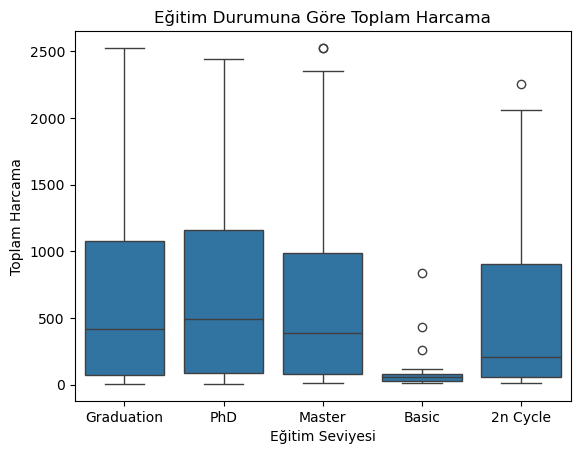

In [96]:
# 1. Grafik: Eğitim Durumuna Göre Toplam Harcama (Boxplot)
# Bu grafik bize hangi eğitim grubunun "daha değerli" (yüksek harcayan) olduğunu gösterir.
sns.boxplot(x='Education', y='Total_Spent', data=df)
plt.title('Eğitim Durumuna Göre Toplam Harcama')
plt.xlabel('Eğitim Seviyesi')
plt.ylabel('Toplam Harcama')
plt.savefig('education_vs_spent.png')
plt.show()

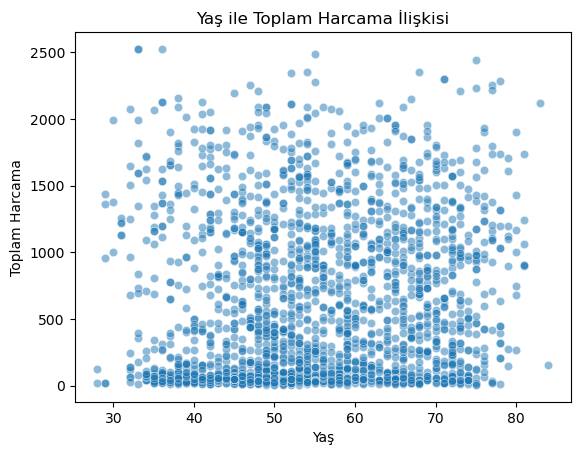

In [98]:
# 2. Grafik: Yaş ile Toplam Harcama İlişkisi (Scatter Plot)
# Bu grafik, belirli yaş gruplarında harcama yoğunlaşması olup olmadığını anlamamızı sağlar.
sns.scatterplot(x='Age', y='Total_Spent', data=df, alpha=0.5)
plt.title('Yaş ile Toplam Harcama İlişkisi')
plt.xlabel('Yaş')
plt.ylabel('Toplam Harcama')
plt.savefig('age_vs_spent.png')
plt.show()

In [100]:
# 1. Gelir ile Alışveriş Kanalları Arasındaki Korelasyon (Hangi kanal kimi getiriyor?)
# Rakam 1'e ne kadar yakınsa, o kanalı 'Zenginler' o kadar çok kullanıyor demektir.
channel_cols = ['NumWebPurchases', 'NumStorePurchases', 'NumCatalogPurchases']
income_correlation = df[['Income'] + channel_cols].corr()['Income'].drop('Income')

In [102]:
# 2. Kampanya Başarı Oranları (Hangi kampanya bütçeyi hak ediyor?)
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
campaign_success = df[campaign_cols].mean() * 100

In [104]:
# 3. Eğitim Seviyesine Göre Müşteri Değeri (Kime odaklanalım?)
edu_analysis = df.groupby('Education').agg({
    'Total_Spent': 'mean',
    'NumDealsPurchases': 'mean',
    'Income': 'mean'
}).sort_values('Total_Spent', ascending=False)

In [106]:
# 4. Yaş Gruplarına Göre Harcama Analizi (Kimi hedefleyelim?)
# Yaşları gruplara ayırarak daha net bir resim çekiyoruz
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 30, 45, 60, 100], labels=['Genç', 'Orta Yaş', 'Olgun', 'Yaşlı'])
age_spending = df.groupby('Age_Group', observed=True)['Total_Spent'].mean()

In [108]:
# SONUÇLARI YAZDIR
print("--- STRATEJİK ANALİZ SONUÇLARI ---")
print("\n1. Kanalların Gelir İlişkisi (Zenginler nereden alıyor?):")
print(income_correlation)
print("\n2. Kampanyaların Başarı Yüzdeleri:")
print(campaign_success)
print("\n3. Eğitim Bazlı Müşteri Profili:")
print(edu_analysis)
print("\n4. Yaş Gruplarının Harcama Ortalaması:")
print(age_spending)

--- STRATEJİK ANALİZ SONUÇLARI ---

1. Kanalların Gelir İlişkisi (Zenginler nereden alıyor?):
NumWebPurchases        0.459265
NumStorePurchases      0.631424
NumCatalogPurchases    0.696589
Name: Income, dtype: float64

2. Kampanyaların Başarı Yüzdeleri:
AcceptedCmp1     6.419530
AcceptedCmp2     1.356239
AcceptedCmp3     7.368897
AcceptedCmp4     7.414105
AcceptedCmp5     7.278481
Response        15.054250
dtype: float64

3. Eğitim Bazlı Müşteri Profili:
            Total_Spent  NumDealsPurchases        Income
Education                                               
PhD          674.283333           2.362500  56088.258333
Graduation   622.188341           2.310314  52169.749776
Master       609.767123           2.424658  52917.534247
2n Cycle     499.489899           2.272727  47625.333333
Basic         81.796296           1.796296  20306.259259

4. Yaş Gruplarının Harcama Ortalaması:
Age_Group
Genç        831.600000
Orta Yaş    559.259740
Olgun       549.035679
Yaşlı       714.919289